1. ¿Qué diferencia existe el error de tipo I y el error de tipo II?

El error de tipo I corresponderia con el falso positivo y el de tipo  II con el falso negativo.
Por convenio, el H0 parte de la negación de la hipótesis que se quiere probar y H1 parte de la afirmación de la misma.

2. ¿Qué es la asimetría?

Para medir la asimetria de una distribución partimos de la media de los datos. La asimetría mide la falta de simetría de los datos, los cuales pueden tener una distribución sesgada a la izquierda o a la derecha, pudiendo tener una distribución asimetrica positiva, negativa y simétrica.

3. ¿Es vuestra variable respuesta asimétrica?

In [149]:
import pandas as pd
import numpy as np
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosistest
# Establecer tamaño fijo de gráficas
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [150]:
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns=None

In [151]:
df=pd.read_csv('../datos/salarios_bajos.csv', index_col=0)
df.head(2) #Hacemos una vista previa de nuestro DataFrame

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


Variable respuesta = salary_in_usd

Calculamos la asimetria de salary

In [152]:
df['salary_in_usd'].skew()

0.41957107086046835

Como hemos visto, nuestra skew es positiva, por lo que nuestra variable es asimetrica +, y por lo tanto, los datos no son normales.

4. ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [153]:
kurtosistest(df['salary_in_usd'])

KurtosistestResult(statistic=-2.3723673584769482, pvalue=0.017674507950461174)

Nuestra variable respuesta tiene una forma leptocurtosa (al tener un resultado de curtosis mayor que 0) y los datos de salario no son normales al tener un pvalor menor a 0.05.

5. ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [154]:
numericas = df.select_dtypes(include='int64')

In [155]:
numericas.head()

,work_year,salary,salary_in_usd,remote_ratio
0,2020,70000,79833,0
1,2020,260000,260000,0
2,2020,85000,109024,50
3,2020,20000,20000,0
4,2020,150000,150000,50


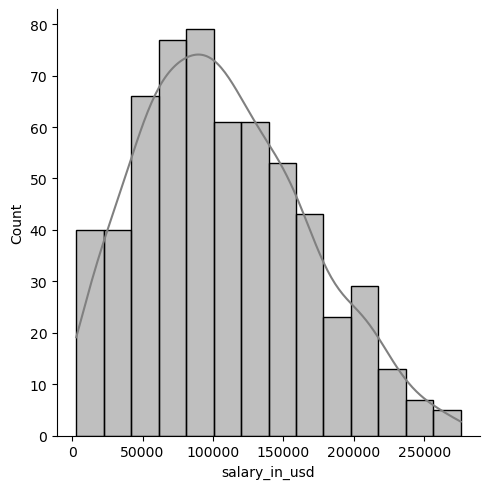

In [156]:
sns.displot(numericas['salary_in_usd'], kde=True, color = 'grey')
plt.show()

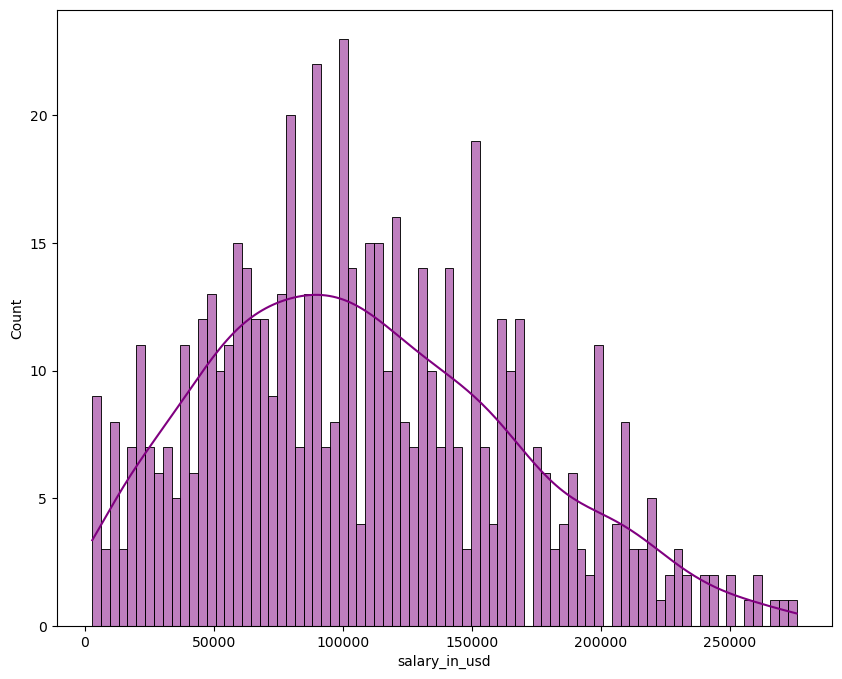

In [157]:
sns.histplot(numericas['salary_in_usd'],bins=80, kde=True, color = 'purple')
plt.show()

Calculamos el shapiro test

In [158]:
stats.shapiro(df['salary_in_usd'])

ShapiroResult(statistic=0.9784162640571594, pvalue=1.045385573661406e-07)

Como podemos ver en el gráfico obtenido pordemos intuir que tenemos un salario máximo que sería un posible outlayer y nos está contaminando los datos.
Para comfirmar si es un outlayer es un dato aislado o existe un rango de salarios en esa cuantia vamos a realizar una tabla de frecuencias de variables númericas para comprobarlo.

In [159]:
df["salario_bajo"]=pd.cut(df["salary_in_usd"],bins=80)

In [160]:
df_g=df.groupby("salario_bajo").size()

In [161]:
df_g.reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
salario_bajo,"(2585.859, 6273.262]","(6273.262, 9687.525]","(9687.525, 13101.787]","(13101.787, 16516.05]","(16516.05, 19930.312]","(19930.312, 23344.575]","(23344.575, 26758.837]","(26758.837, 30173.1]","(30173.1, 33587.362]","(33587.362, 37001.625]","(37001.625, 40415.888]","(40415.888, 43830.15]","(43830.15, 47244.412]","(47244.412, 50658.675]","(50658.675, 54072.938]","(54072.938, 57487.2]","(57487.2, 60901.462]","(60901.462, 64315.725]","(64315.725, 67729.987]","(67729.987, 71144.25]","(71144.25, 74558.512]","(74558.512, 77972.775]","(77972.775, 81387.037]","(81387.037, 84801.3]","(84801.3, 88215.562]","(88215.562, 91629.825]","(91629.825, 95044.088]","(95044.088, 98458.35]","(98458.35, 101872.612]","(101872.612, 105286.875]","(105286.875, 108701.138]","(108701.138, 112115.4]","(112115.4, 115529.662]","(115529.662, 118943.925]","(118943.925, 122358.188]","(122358.188, 125772.45]","(125772.45, 129186.712]","(129186.712, 132600.975]","(132600.975, 136015.238]","(136015.238, 139429.5]","(139429.5, 142843.762]","(142843.762, 146258.025]","(146258.025, 149672.288]","(149672.288, 153086.55]","(153086.55, 156500.812]","(156500.812, 159915.075]","(159915.075, 163329.338]","(163329.338, 166743.6]","(166743.6, 170157.862]","(170157.862, 173572.125]","(173572.125, 176986.387]","(176986.387, 180400.65]","(180400.65, 183814.912]","(183814.912, 187229.175]","(187229.175, 190643.438]","(190643.438, 194057.7]","(194057.7, 197471.962]","(197471.962, 200886.225]","(200886.225, 204300.488]","(204300.488, 207714.75]","(207714.75, 211129.012]","(211129.012, 214543.275]","(214543.275, 217957.537]","(217957.537, 221371.8]","(221371.8, 224786.062]","(224786.062, 228200.325]","(228200.325, 231614.588]","(231614.588, 235028.85]","(235028.85, 238443.112]","(238443.112, 241857.375]","(241857.375, 245271.637]","(245271.637, 248685.9]","(248685.9, 252100.162]","(252100.162, 255514.425]","(255514.425, 258928.688]","(258928.688, 262342.95]","(262342.95, 265757.212]","(265757.212, 269171.475]","(269171.475, 272585.738]","(272585.738, 276000.0]"
0,9,3,8,3,7,11,7,6,7,5,11,6,12,13,10,11,15,14,12,12,9,13,20,7,13,22,7,8,23,14,4,15,15,10,16,8,7,14,10,7,14,7,3,19,7,4,12,10,12,0,7,6,3,4,6,3,2,11,0,4,8,3,3,5,1,2,3,2,0,2,2,0,2,0,1,2,0,1,1,1


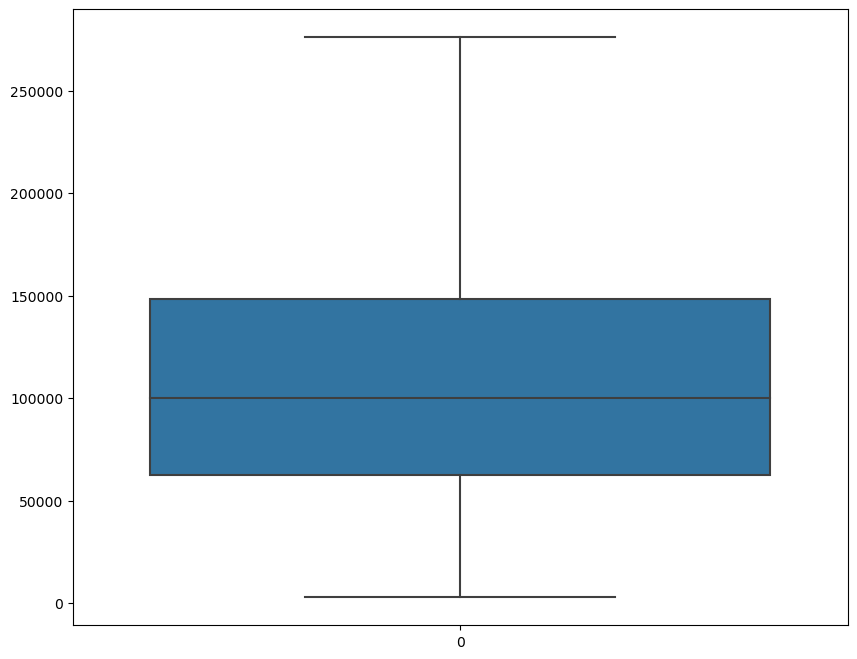

In [162]:
n = df['salary_in_usd']
sns.boxplot(data=df['salary_in_usd'])

plt.show()